In [1]:
#Load libraries
import csv
from textblob import TextBlob
import os
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob.sentiments import NaiveBayesAnalyzer
from nltk.corpus import stopwords
import string
import nltk 
import textmining
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

In [2]:
# Set working directory
os.chdir("F:/Analytics")

In [3]:
#Load Text data
post = pd.read_csv("Post.csv")

In [4]:
post.head(20)

,Id,Post
0,1,cumin seed) and Hepatitis
1,2,iron overload chelation diabetes and hepatitis
2,3,please help me.
3,4,two different test results!
4,5,miscarriage and devastation..!!
5,6,Heart Dysfunction Tied in Thalassemia. Take V...
6,7,arthritis and fibromyalgia
7,8,Exjade)
8,9,please help!
9,10,Good News? Yeah I guess so :)


In [5]:
# Select few text
post = post.iloc[:1000]

In [6]:
post.shape

(1000, 2)

In [7]:
# Download Repository
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [8]:
#Extract stopwords
stop = set(stopwords.words('english'))



In [9]:

# Remove punctuation marks
exclude = set(string.punctuation)

In [10]:
stop

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 'own',
 'r

In [11]:
exclude

{'!',
 '"',
 '#',
 '$',
 '%',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '.',
 '/',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 '[',
 '\\',
 ']',
 '^',
 '_',
 '`',
 '{',
 '|',
 '}',
 '~'}

In [20]:
# Text pre processing
def clean(doc):
    stop_free = " ".join([i for i in doc.lower().split() if i not in stop])
    punc_free = ''.join([i for i in stop_free if i not in exclude])
    num_free = ''.join(i for i in punc_free if not i.isdigit())
    return num_free

post_corpus = [clean(post.iloc[i,1]) for i in range(0, post.shape[0])]

In [21]:
post_corpus[9]

'good news yeah guess '

In [22]:
post.head(10)

,Id,Post
0,1,cumin seed) and Hepatitis
1,2,iron overload chelation diabetes and hepatitis
2,3,please help me.
3,4,two different test results!
4,5,miscarriage and devastation..!!
5,6,Heart Dysfunction Tied in Thalassemia. Take V...
6,7,arthritis and fibromyalgia
7,8,Exjade)
8,9,please help!
9,10,Good News? Yeah I guess so :)


In [23]:
# Create document term matrix
tdm = textmining.TermDocumentMatrix()

for i in post_corpus:
    print(i)
    tdm.add_doc(i)

cumin seed hepatitis
iron overload chelation diabetes hepatitis
please help me
two different test results
miscarriage devastation
heart dysfunction tied thalassemia take vitamin please
arthritis fibromyalgia
exjade
please help
good news yeah guess 
liver 
im new forum
pushing kidney
problems growth problems
  
kelfer desferal
question
help me im suffering worse fatigue dizzy
anyone tried heard
guidance please
trait carrier
need advise
need help
common this
blank
minors also affected
antacids drug interactions
blood test iron cbc liver adding up
hb levels closer intermedia
cirhosis liver tumor
recommended 
hon mr ted chudleigh
today hb 
bone marrow transplantation centre
supplements health
take iron not
fatigue iron levels
 kg
iron dropping  help
treat 
eugenio lamesa
pregnant hypothyroidismfeed back appreciated
kelfer treatment pkan successful oakland
heart failure
suggestions anything
ferritin around  safe
that
starchconjugating deferoxamine sdfo
desferal l combination
etc
jadenu appr

In [24]:
# Write tdm
tdm.write_csv('TDM_DataFRame.csv', cutoff = 1)

In [58]:
tdm


In [41]:
type(tdm)

textmining.TermDocumentMatrix

In [25]:
# Load dataframe for analysis
df = pd.read_csv('TDM_DataFRame.csv')

In [26]:
df

,cumin,seed,hepatitis,iron,overload,chelation,diabetes,please,help,me,...,discusssion,accuracy,baal,kow,compact,homei,gel,wet,cloth,fixed
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,1,2,1,1,1,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,1,1,1,0


In [27]:
df.shape

(1000, 7393)

In [30]:
df['patient'].

0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Name: patient, Length: 1000, dtype: int64

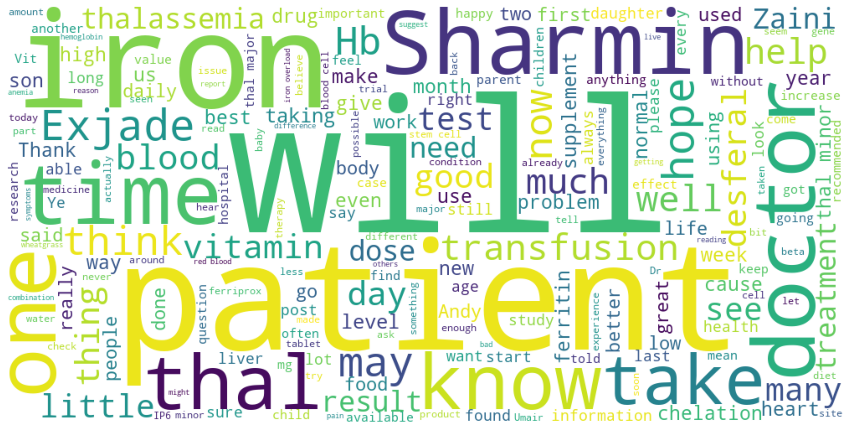

In [29]:
#Plot wordcloud
wordcloud = WordCloud(width = 1000, height = 500, stopwords = STOPWORDS, background_color = 'white').generate(
                        ''.join(post['Post']))

plt.figure(figsize = (15,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [31]:
# Sentiment analysis using Text Blob
# Create empty dataframe to store results
FinalResults = pd.DataFrame()

# Run Engine
for i in range(0, post.shape[0]):
    
    blob = TextBlob(post.iloc[i,1])
    
    temp = pd.DataFrame({'Comments': post.iloc[i,1], 'Polarity': blob.sentiment.polarity}, index = [0])
    
    FinalResults = FinalResults.append(temp)    

In [32]:
FinalResults.shape

(1000, 2)

In [33]:
FinalResults.head(20)

,Comments,Polarity
0,cumin seed) and Hepatitis,0.000000
0,iron overload chelation diabetes and hepatitis,0.000000
0,please help me.,0.000000
0,two different test results!,0.000000
0,miscarriage and devastation..!!,0.000000
0,Heart Dysfunction Tied in Thalassemia. Take V...,0.000000
0,arthritis and fibromyalgia,0.000000
0,Exjade),0.000000
0,please help!,0.000000
0,Good News? Yeah I guess so :),0.600000


In [34]:
# Sentiment Analysis using Vader
FinalResults_Vader = pd.DataFrame()

# Create engine
analyzer = SentimentIntensityAnalyzer()

# Run Engine
for i in range(0, post.shape[0]):
    
    snt = analyzer.polarity_scores(post.iloc[i,1])
    
    temp = pd.DataFrame({'Comments': post.iloc[i,1], 'Polarity': list(snt.items())[3][1]}, index = [0])

    FinalResults_Vader = FinalResults_Vader.append(temp)    

In [35]:
FinalResults_Vader.head(20)

,Comments,Polarity
0,cumin seed) and Hepatitis,0.0000
0,iron overload chelation diabetes and hepatitis,-0.3612
0,please help me.,0.6124
0,two different test results!,0.0000
0,miscarriage and devastation..!!,-0.5242
0,Heart Dysfunction Tied in Thalassemia. Take V...,0.7096
0,arthritis and fibromyalgia,0.0000
0,Exjade),0.0000
0,please help!,0.6476
0,Good News? Yeah I guess so :),0.8388
